# 2020-09-07 ~ 2020-09-08  Weather analysis


In [46]:
import requests
from bs4 import BeautifulSoup

data_weather = list()
data_rain_probability = list()
data_rainfall = list()
data_temp_min = list()
data_temp_max = list()
data_temp = list()
data_wetness = list()

html = requests.get("https://www.weather.go.kr/weather/forecast/timeseries.jsp")
soup = BeautifulSoup(html.text,"html.parser")

table = soup.find('table',{'class' : 'forecastNew3'})
tr = table.tbody.tr

tr = tr.next_sibling.next_sibling.next_sibling.next_sibling


for weather in tr.children:
    if weather.name == 'td' and len(weather.contents) > 0:
        data_weather.append(weather['title'])
print('Save weather !')
tr = tr.next_sibling.next_sibling


for rain_probability in tr.children:
    if rain_probability.name == 'td' and len(rain_probability.contents) > 0:
        data_rain_probability.append(rain_probability.contents[0])
print('Save rain probability !')
tr = tr.next_sibling.next_sibling


for rain in tr.children:
    if rain.name == 'td' and len(rain.contents) > 0:
        num = int(rain['colspan'])
        for i in range(num):
            data_rainfall.append(rain.contents[0].strip())
print('Save rainfall !')
tr = tr.next_sibling.next_sibling


for temp in tr.children:
    if temp.name == 'td' and len(temp.contents) > 0:
        num = int(temp['colspan'])
        for i in range(num):
            data_temp_min.append(temp.contents[0].get_text())
            data_temp_max.append(temp.contents[2].get_text())
print('Save Min/Max temperature !')
tr = tr.next_sibling.next_sibling


for temp in tr.children:
    if temp.name == 'td' and len(temp.contents) > 0:
        data_temp.append(temp.contents[0].get_text())
print('Save temperature !')
tr = tr.next_sibling.next_sibling.next_sibling.next_sibling


for wet_ness in tr.children:
    if wet_ness.name == 'td' and len(wet_ness.contents) > 0:
        data_wetness.append(wet_ness.contents[0].get_text())
print('Save wetness !')

Save weather !
Save rain probability !
Save rainfall !
Save Min/Max temperature !
Save temperature !
Save wetness !


In [31]:
print(data_temp)
print(data_temp_min)
print(data_temp_max)

['21', '20', '20', '20', '21', '21', '22', '22', '22', '21', '21', '23', '25', '25', '24', '22', '21']
['20', '20', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21', '21', '21']
['22', '22', '22', '22', '22', '22', '22', '22', '26', '26', '26', '26', '26', '26', '26', '26']


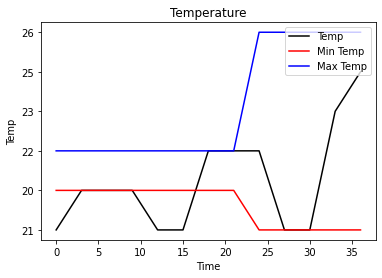

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0,39,3)
plt.plot(x,data_temp[:13], color = 'k', label = 'Temp')
plt.plot(x,data_temp_min[:13], color = 'r', label = 'Min Temp')
plt.plot(x,data_temp_max[:13], color = 'b', label = 'Max Temp')
plt.xlabel('Time')
plt.ylabel('Temp')
plt.title('Temperature')
plt.legend(loc='upper right')
plt.show()


In [34]:
print(data_rain_probability)

['80', '80', '80', '80', '80', '80', '80', '80', '80', '80', '80', '70', '60', '0', '20', '20']


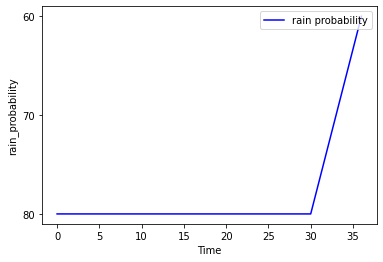

In [37]:
x = np.arange(0,39,3)
plt.plot(x,data_rain_probability[:13], color = 'b', label = 'rain probability')
plt.xlabel('Time')
plt.ylabel('rain_probability')
plt.legend(loc='upper right')
plt.show()

In [35]:
print(data_wetness)

['85', '85', '85', '85', '90', '90', '95', '90', '85', '80', '80', '70', '65', '70', '75', '85', '95']


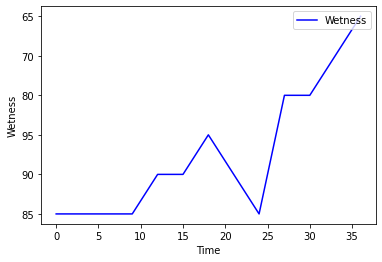

In [27]:
x = np.arange(0,39,3)
plt.plot(x,data_wetness[:13], color = 'b', label = 'Wetness')
plt.xlabel('Time')
plt.ylabel('Wetness')
plt.legend(loc='upper right')
plt.show()


In [42]:
print(data_rainfall)

['10~19', '20~39mm', '20~39mm', '20~39mm', '20~39mm', '20~39mm', '20~39mm', '10~19mm', '10~19mm', '1~4mm', '1~4mm', '5~9mm', '5~9mm', '-', '-']


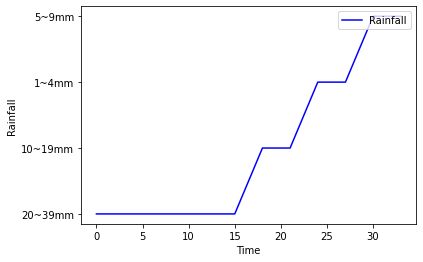

In [45]:
x = np.arange(0,36,3)
plt.plot(x,data_rainfall[1:13], color = 'b', label = 'Rainfall')
plt.xlabel('Time')
plt.ylabel('Rainfall')
plt.legend(loc='upper right')
plt.show()

In [38]:
print(data_weather)

['비', '비', '비', '비', '비', '비', '비', '비', '비', '비', '비', '비', '비', '맑음', '구름 많음', '구름 많음']
